<a href="https://colab.research.google.com/github/jinnic/ada-project1/blob/main/Data_Cleaning_for_case_pridiction_using_PERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -U scikit-learn==1.4

In [ ]:
github_data_url = 'https://raw.githubusercontent.com/jinnic/ada-project1/refs/heads/main/raw_case_approve_2024_1.csv'

# Read the CSV file directly from the GitHub URL
df = pd.read_csv(github_data_url)

df.head()

display(df.head())

,CASE_STATUS,OCCUPATION_TYPE,EMP_NAICS,EMP_NUM_PAYROLL,EMP_YEAR_COMMENCED,JOB_TITLE,JOB_OPP_WAGE_FROM,JOB_OPP_WAGE_TO,JOB_OPP_WAGE_PER,PRIMARY_WORKSITE_TYPE,PRIMARY_WORKSITE_CITY,PRIMARY_WORKSITE_STATE,PRIMARY_WORKSITE_BLS_AREA,IS_MULTIPLE_LOCATIONS,OTHER_REQ_IS_FULLTIME_EMP,OTHER_REQ_IS_LIVEIN_HOUSEHOLD,OTHER_REQ_JOB_FOREIGN_LANGUAGE
0,Withdrawn,Non-professional,721110,10.0,2014,Digital Marketing Coordinator,"$39,416.00","$39,416.00",Year,Business Premises,HONOLULU,HI,"Urban Honolulu, HI",N,Y,N,N
1,Withdrawn,Professional occupation,541511,33.0,2006,Systems Analyst,"$84,781.00",NaN,Year,Business Premises,Suwanee,GA,"Atlanta-Sandy Springs-Roswell, GA",N,Y,N,N
2,Withdrawn,Professional occupation,561422,20000.0,1988,Software Engineer,"$100,526.00","$100,526.00",Year,Business Premises,Cincinnati,OH,"Cincinnati, OH-KY-IN",N,Y,N,N
3,Withdrawn,Non-professional,48411,15.0,1986,Driver - Tractor Trailer,"$58,490.00","$58,490.00",Year,Business Premises,Bound Brook,NJ,"New York-Newark-Jersey City, NY-NJ-PA",N,Y,N,N
4,Withdrawn,Professional occupation,541110,20.0,2006,Associate Attorney,"$105,000.00","$110,000.00",Year,Business Premises,New York,NY,"New York-Newark-Jersey City, NY-NJ-PA",N,Y,N,N


# Step 1:  Cleaning Dataset from PERM [2024 PERM data](https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_New_Form_FY2024_Q4.xlsx)


1.   **Filter out only yearly wage, fulltime, non-domestic help job**
2.   **Create Avg wage feature with 'JOB_OPP_WAGE_FROM' &	'JOB_OPP_WAGE_TO'**
3. **Simplify NAICS code to first two digit**


## **✅ Filter out data**

```
'CASE_STATUS' == 'Certified' & 'Denied'
'OCCUPATION_TYPE' == 'Professional occupation'
'JOB_OPP_WAGE_PER' == 'Year'
'OTHER_REQ_IS_FULLTIME_EMP' == 'Y'
'OTHER_REQ_IS_LIVEIN_HOUSEHOLD' == 'N'
```



In [ ]:
df_filter = df[
    (df['CASE_STATUS'] == 'Certified') | (df['CASE_STATUS'] == 'Denied')&
    (df['JOB_OPP_WAGE_PER'] == 'Year') &
    (df['OTHER_REQ_IS_FULLTIME_EMP'] == 'Y') &
    (df['OTHER_REQ_IS_LIVEIN_HOUSEHOLD'] == 'N')      # Exclude live-in workers
].copy()

# Drop NA for 'OTHER_REQ_IS_LIVEIN_HOUSEHOLD'
df_filter.dropna(subset=['OTHER_REQ_IS_LIVEIN_HOUSEHOLD'], inplace=True)

print(f"Original row count: {len(df)}")
print(f"Clean row count: {len(df_filter)}")

display(df_filter.head())

print(df_filter.isna().sum())


Original row count: 22292
Clean row count: 15794


,CASE_STATUS,OCCUPATION_TYPE,EMP_NAICS,EMP_NUM_PAYROLL,EMP_YEAR_COMMENCED,JOB_TITLE,JOB_OPP_WAGE_FROM,JOB_OPP_WAGE_TO,JOB_OPP_WAGE_PER,PRIMARY_WORKSITE_TYPE,PRIMARY_WORKSITE_CITY,PRIMARY_WORKSITE_STATE,PRIMARY_WORKSITE_BLS_AREA,IS_MULTIPLE_LOCATIONS,OTHER_REQ_IS_FULLTIME_EMP,OTHER_REQ_IS_LIVEIN_HOUSEHOLD,OTHER_REQ_JOB_FOREIGN_LANGUAGE
4452,Certified,Professional occupation,5416,2201.0,2000,Test Automation Engineering Manager,"$139,200.00",NaN,Year,Business Premises,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",N,Y,N,N
4453,Certified,Professional occupation,5416,593.0,2000,Application Development Manager,"$115,800.00",NaN,Year,Business Premises,Miami,FL,"Miami-Fort Lauderdale-West Palm Beach, FL",N,Y,N,N
4454,Certified,Professional occupation,5416,4354.0,2000,Test Automation Engineering Specialist,"$109,075.00",NaN,Year,Business Premises,Austin,TX,"Austin-Round Rock, TX",N,Y,N,N
4455,Certified,Non-professional,445210,50.0,1999,Stockers,"$25,875.00","$25,875.00",Year,Business Premises,ENNIS,TX,"Dallas-Fort Worth-Arlington, TX",N,Y,N,N
4456,Certified,Professional occupation,5416,2201.0,2000,App/Cloud Support Manager,"$140,462.00",NaN,Year,Business Premises,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",N,Y,N,N


CASE_STATUS                          0
OCCUPATION_TYPE                      0
EMP_NAICS                            0
EMP_NUM_PAYROLL                      3
EMP_YEAR_COMMENCED                   0
JOB_TITLE                           12
JOB_OPP_WAGE_FROM                   12
JOB_OPP_WAGE_TO                   8611
JOB_OPP_WAGE_PER                    12
PRIMARY_WORKSITE_TYPE                0
PRIMARY_WORKSITE_CITY              949
PRIMARY_WORKSITE_STATE             949
PRIMARY_WORKSITE_BLS_AREA          948
IS_MULTIPLE_LOCATIONS                0
OTHER_REQ_IS_FULLTIME_EMP            0
OTHER_REQ_IS_LIVEIN_HOUSEHOLD        0
OTHER_REQ_JOB_FOREIGN_LANGUAGE       0
dtype: int64


## **✅ Create Average wage colum**

```
'JOB_AVG_WAGE' is not empty # calculated with 'JOB_OPP_WAGE_FROM' &
'JOB_OPP_WAGE_TO'
```




In [ ]:
df_clean = df_filter.copy()

# Convert relevant columns to numeric, stripping non-numeric characters
for col in ['JOB_OPP_WAGE_FROM', 'JOB_OPP_WAGE_TO']:
    df_clean[col] = df_clean[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# If 'JOB_OPP_WAGE_TO' is empty, replace it with 'JOB_OPP_WAGE_FROM'
df_clean['JOB_OPP_WAGE_TO'].fillna(df_clean['JOB_OPP_WAGE_FROM'], inplace=True)

# Create 'JOB_AVG_WAGE' by averaging the two columns
df_clean['JOB_AVG_WAGE'] = (df_clean['JOB_OPP_WAGE_FROM'] + df_clean['JOB_OPP_WAGE_TO']) / 2

# Drop null row of 'JOB_AVG_WAGE'
print(f"Original row count: {len(df_clean)}")
df_clean.dropna(subset=['JOB_AVG_WAGE','PRIMARY_WORKSITE_BLS_AREA'], inplace=True)
print(f"Clean row count: {len(df_clean)}")

print(df_clean.isna().sum())

# Check calculation
print(df_clean['JOB_AVG_WAGE'].dtype)
display(df_clean[['JOB_OPP_WAGE_FROM', 'JOB_OPP_WAGE_TO', 'JOB_AVG_WAGE']].head(35))




Original row count: 15794
Clean row count: 14834
CASE_STATUS                       0
OCCUPATION_TYPE                   0
EMP_NAICS                         0
EMP_NUM_PAYROLL                   0
EMP_YEAR_COMMENCED                0
JOB_TITLE                         0
JOB_OPP_WAGE_FROM                 0
JOB_OPP_WAGE_TO                   0
JOB_OPP_WAGE_PER                  0
PRIMARY_WORKSITE_TYPE             0
PRIMARY_WORKSITE_CITY             1
PRIMARY_WORKSITE_STATE            1
PRIMARY_WORKSITE_BLS_AREA         0
IS_MULTIPLE_LOCATIONS             0
OTHER_REQ_IS_FULLTIME_EMP         0
OTHER_REQ_IS_LIVEIN_HOUSEHOLD     0
OTHER_REQ_JOB_FOREIGN_LANGUAGE    0
JOB_AVG_WAGE                      0
dtype: int64
float64


/tmp/ipython-input-258633564.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['JOB_OPP_WAGE_TO'].fillna(df_clean['JOB_OPP_WAGE_FROM'], inplace=True)


,JOB_OPP_WAGE_FROM,JOB_OPP_WAGE_TO,JOB_AVG_WAGE
4452,139200.0,139200.0,139200.0
4453,115800.0,115800.0,115800.0
4454,109075.0,109075.0,109075.0
4455,25875.0,25875.0,25875.0
4456,140462.0,140462.0,140462.0
4457,153000.0,153000.0,153000.0
4458,200100.0,200100.0,200100.0
4459,174075.0,174075.0,174075.0
4460,21923.0,21923.0,21923.0
4461,123000.0,123000.0,123000.0


##✅ **Create join table for NAICS with Industry name**

In [ ]:
naics_data = """
11	Agriculture, Forestry, Fishing and Hunting
21	Mining, Quarrying, and Oil and Gas Extraction
22	Utilities
23	Construction
31-33	Manufacturing
42	Wholesale Trade
44-45	Retail Trade
48-49	Transportation and Warehousing
51	Information
52	Finance and Insurance
53	Real Estate and Rental and Leasing
54	Professional, Scientific, and Technical Services
55	Management of Companies and Enterprises
56	Administrative and Support and Waste Management and Remediation Services
61	Educational Services
62	Health Care and Social Assistance
71	Arts, Entertainment, and Recreation
72	Accommodation and Food Services
81	Other Services (except Public Administration)
92	Public Administration
"""

naics_mapping = {}
for line in naics_data.strip().split('\n'):
    parts = line.split('\t')
    code_str = parts[0]
    sector_name = parts[1]

    if '-' in code_str:
        start, end = map(int, code_str.split('-'))
        for i in range(start, end + 1):
            naics_mapping[str(i)] = sector_name
    else:
        naics_mapping[code_str] = sector_name

# Create a DataFrame from the mapping
naics_df = pd.DataFrame(naics_mapping.items(), columns=['NAICS_CODE', 'NAICS_DESCRIPTION'])

print("NAICS CODE Mapping DataFrame:")
display(naics_df.head(10))
print(f"Total unique NAICS CODES: {len(naics_df)}")


NAICS CODE Mapping DataFrame:


,NAICS_CODE,NAICS_DESCRIPTION
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,21,"Mining, Quarrying, and Oil and Gas Extraction"
2,22,Utilities
3,23,Construction
4,31,Manufacturing
5,32,Manufacturing
6,33,Manufacturing
7,42,Wholesale Trade
8,44,Retail Trade
9,45,Retail Trade


Total unique NAICS CODES: 24


## **✅ Simplyfy NAICS - North American Industry Classification System**

Keep first two digit for simpler category of industry

In [ ]:
# Convert the EMP_NAICS column to a string
# slice to keep first two digit
df_clean['NAICS_CODE'] = df_clean['EMP_NAICS'].astype(str).str[0:2]

# Check its unique values and count to make sure it's matching join table
print(sorted(df_clean['NAICS_CODE'].unique()))
print(f"Total unique NAICS codes mapped: {len(df_clean['NAICS_CODE'].unique())}")


display(df_clean[['EMP_NAICS', 'NAICS_CODE']].head())

['11', '21', '22', '23', '31', '32', '33', '42', '44', '45', '48', '49', '51', '52', '53', '54', '55', '56', '61', '62', '71', '72', '81', '92']
Total unique NAICS codes mapped: 24


,EMP_NAICS,NAICS_CODE
4452,5416,54
4453,5416,54
4454,5416,54
4455,445210,44
4456,5416,54


In [ ]:
# Merge df_filter with naics_df to add the NAICS_DESCRIPTION
df_clean = pd.merge(
    df_clean,
    naics_df,
    left_on='NAICS_CODE',
    right_on='NAICS_CODE', # Use NAICS_CODE from naics_df
    how='left'
)

# Display the first few rows to show the new 'NAICS_DESCRIPTION' column
display(df_clean[['EMP_NAICS', 'NAICS_CODE', 'NAICS_DESCRIPTION']].head())

# Check for any missing values in the new 'NAICS_DESCRIPTION' column
print(f"Missing values in NAICS_DESCRIPTION after merge: {df_clean['NAICS_DESCRIPTION'].isnull().sum()}")

,EMP_NAICS,NAICS_CODE,NAICS_DESCRIPTION
0,5416,54,"Professional, Scientific, and Technical Services"
1,5416,54,"Professional, Scientific, and Technical Services"
2,5416,54,"Professional, Scientific, and Technical Services"
3,445210,44,Retail Trade
4,5416,54,"Professional, Scientific, and Technical Services"


Missing values in NAICS_DESCRIPTION after merge: 0


## **✅ Clean Job title**
* Merge jr and junior, sr and senior
* Keep similar software engineer job in same

In [ ]:
# Convert to lowercase and remove leading/trailing spaces
df_clean['JOB_TITLE_CLEAN'] = df_clean['JOB_TITLE'].str.lower().str.strip()
print(f"Unique Titles before cleaning: {df_clean['JOB_TITLE'].nunique()}")

# remove common seniority prefixes/suffixes and numbers from title
df_clean['JOB_TITLE_CLEAN'] = (
    df_clean['JOB_TITLE_CLEAN']
    .str.replace(r'\b(sr|senior)\b', 'sr.', regex=True)
    .str.replace(r'\b(jr|junior)\b', 'jr.', regex=True)
    .str.replace(r'\d+', '', regex=True) # Remove numbers
    .str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation (e.g., commas, dashes)
    .str.replace(r'\s+', ' ', regex=True)     # Collapse multiple spaces into one
    .str.strip()
)

# replace 'software development engineer' with 'software engineer'
df_clean['JOB_TITLE_CLEAN'] = df_clean['JOB_TITLE_CLEAN'].str.replace(
    'software development engineer',
    'software engineer',
    regex=True
)

# replace 'software developer' with 'software engineer'
df_clean['JOB_TITLE_CLEAN'] = df_clean['JOB_TITLE_CLEAN'].str.replace(
    'software developer',
    'software engineer',
    regex=True
)

# replace 'software programmer' with 'software engineer'
df_clean['JOB_TITLE_CLEAN'] = df_clean['JOB_TITLE_CLEAN'].str.replace(
    'software programmer',
    'software engineer',
    regex=True
)

print(f"Unique Titles after cleaning: {df_clean['JOB_TITLE_CLEAN'].nunique()}")

Unique Titles before cleaning: 5514
Unique Titles after cleaning: 4731


## ✅ **Drop unneccesry columns**
Columns that are filtered or used to create feature.

* 'JOB_OPP_WAGE_TO' & 'JOB_OPP_WAGE_FROM'
* 'JOB_OPP_WAGE_PER' == 'Year'
* 'EMP_NAICS' <- full digit
* 'OTHER_REQ_IS_FULLTIME_EMP' == 'Y'
* 'OTHER_REQ_IS_LIVEIN_HOUSEHOLD' == 'N'



In [ ]:
columns_to_drop = [
    'JOB_OPP_WAGE_TO',
    'JOB_OPP_WAGE_FROM',
    'JOB_OPP_WAGE_PER',
    'EMP_NAICS',
    'OTHER_REQ_IS_FULLTIME_EMP',
    'OTHER_REQ_IS_LIVEIN_HOUSEHOLD'
]
print("Columns dropped successfully.")
print(f"Clean row count: {len(df_clean)}")
df_clean = df_clean.drop(columns=columns_to_drop)
print(f"Final row count: {len(df_clean)}")

display(df_clean.head())
print("Missing values (NA count) per column:")
print(df_clean.isna().sum())

Columns dropped successfully.
Clean row count: 14834
Final row count: 14834


,CASE_STATUS,OCCUPATION_TYPE,EMP_NUM_PAYROLL,EMP_YEAR_COMMENCED,JOB_TITLE,PRIMARY_WORKSITE_TYPE,PRIMARY_WORKSITE_CITY,PRIMARY_WORKSITE_STATE,PRIMARY_WORKSITE_BLS_AREA,IS_MULTIPLE_LOCATIONS,OTHER_REQ_JOB_FOREIGN_LANGUAGE,JOB_AVG_WAGE,NAICS_CODE,NAICS_DESCRIPTION,JOB_TITLE_CLEAN
0,Certified,Professional occupation,2201.0,2000,Test Automation Engineering Manager,Business Premises,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",N,N,139200.0,54,"Professional, Scientific, and Technical Services",test automation engineering manager
1,Certified,Professional occupation,593.0,2000,Application Development Manager,Business Premises,Miami,FL,"Miami-Fort Lauderdale-West Palm Beach, FL",N,N,115800.0,54,"Professional, Scientific, and Technical Services",application development manager
2,Certified,Professional occupation,4354.0,2000,Test Automation Engineering Specialist,Business Premises,Austin,TX,"Austin-Round Rock, TX",N,N,109075.0,54,"Professional, Scientific, and Technical Services",test automation engineering specialist
3,Certified,Non-professional,50.0,1999,Stockers,Business Premises,ENNIS,TX,"Dallas-Fort Worth-Arlington, TX",N,N,25875.0,44,Retail Trade,stockers
4,Certified,Professional occupation,2201.0,2000,App/Cloud Support Manager,Business Premises,Houston,TX,"Houston-The Woodlands-Sugar Land, TX",N,N,140462.0,54,"Professional, Scientific, and Technical Services",appcloud support manager


Missing values (NA count) per column:
CASE_STATUS                       0
OCCUPATION_TYPE                   0
EMP_NUM_PAYROLL                   0
EMP_YEAR_COMMENCED                0
JOB_TITLE                         0
PRIMARY_WORKSITE_TYPE             0
PRIMARY_WORKSITE_CITY             1
PRIMARY_WORKSITE_STATE            1
PRIMARY_WORKSITE_BLS_AREA         0
IS_MULTIPLE_LOCATIONS             0
OTHER_REQ_JOB_FOREIGN_LANGUAGE    0
JOB_AVG_WAGE                      0
NAICS_CODE                        0
NAICS_DESCRIPTION                 0
JOB_TITLE_CLEAN                   0
dtype: int64



# Step 2: Divide into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

df_final = df_clean.copy()

# 1. Define the final X (Features) and Y (Target)
Y = df_final['CASE_STATUS']
X = df_final.drop(columns=['CASE_STATUS'])

# 2. Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.2, # 20% for testing
    random_state=42 # Ensures reproducible
)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (11867, 14), X_test shape: (2967, 14)
y_train shape: (11867,), y_test shape: (2967,)


# **Step 3: Explore training set**

In [ ]:
# Show the data type of the training features
print("Training Features (X_train) Information:")
X_train.info()

# Show the summary of the target variable (wage)
print("\nTarget (y_train) Summary:")
print(y_train.describe())

Training Features (X_train) Information:
<class 'pandas.core.frame.DataFrame'>
Index: 11867 entries, 14218 to 7270
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OCCUPATION_TYPE                 11867 non-null  object 
 1   EMP_NUM_PAYROLL                 11867 non-null  float64
 2   EMP_YEAR_COMMENCED              11867 non-null  int64  
 3   JOB_TITLE                       11867 non-null  object 
 4   PRIMARY_WORKSITE_TYPE           11867 non-null  object 
 5   PRIMARY_WORKSITE_CITY           11866 non-null  object 
 6   PRIMARY_WORKSITE_STATE          11866 non-null  object 
 7   PRIMARY_WORKSITE_BLS_AREA       11867 non-null  object 
 8   IS_MULTIPLE_LOCATIONS           11867 non-null  object 
 9   OTHER_REQ_JOB_FOREIGN_LANGUAGE  11867 non-null  object 
 10  JOB_AVG_WAGE                    11867 non-null  float64
 11  NAICS_CODE                      11867 non-null  object

In [ ]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumerical features:")
print(numerical_features)


Categorical features:
['OCCUPATION_TYPE', 'JOB_TITLE', 'PRIMARY_WORKSITE_TYPE', 'PRIMARY_WORKSITE_CITY', 'PRIMARY_WORKSITE_STATE', 'PRIMARY_WORKSITE_BLS_AREA', 'IS_MULTIPLE_LOCATIONS', 'OTHER_REQ_JOB_FOREIGN_LANGUAGE', 'NAICS_CODE', 'NAICS_DESCRIPTION', 'JOB_TITLE_CLEAN']

Numerical features:
['EMP_NUM_PAYROLL', 'EMP_YEAR_COMMENCED', 'JOB_AVG_WAGE']


# **Step 4: Data cleaning**

## ✅ **Company Size & Tenure**
Define the boundaries for company size categories and calculate the age of the company based on the year the dataset was published (Fiscal Year 2024)
### **Thresholds common in business/economic:**

* Small: < 50 employees
* Mid: 50 to 1,000 employees
* Large: > 1,000 employees



```
bins = [0, 50, 1000, np.inf]
labels = ['Small', 'Mid', 'Large']
```



In [ ]:
bins = [0, 50, 1000, np.inf]
labels = ['Small', 'Mid', 'Large']

X_train['COMPANY_SIZE_CAT'] = pd.cut(
    X_train['EMP_NUM_PAYROLL'],
    bins=bins,
    labels=labels
)

X_test['COMPANY_SIZE_CAT'] = pd.cut(
    X_train['EMP_NUM_PAYROLL'],
    bins=bins,
    labels=labels
)

print("\nCompany Size Distribution:")
print(X_train['COMPANY_SIZE_CAT'].value_counts(dropna=False))


Company Size Distribution:
COMPANY_SIZE_CAT
Mid      4918
Large    3487
Small    3401
NaN        61
Name: count, dtype: int64


In [ ]:
##---------------create 'COMPANY_AGE' column
# The dataset is from FY 2024

REFERENCE_YEAR = 2024

# Ensure EMP_YEAR_COMMENCED is treated as an integer (Year)
X_train['EMP_YEAR_COMMENCED'] = pd.to_numeric(X_train['EMP_YEAR_COMMENCED'], errors='coerce')
X_test['EMP_YEAR_COMMENCED'] = pd.to_numeric(X_test['EMP_YEAR_COMMENCED'], errors='coerce')

# Calculate company age in years
X_train['COMPANY_AGE'] = REFERENCE_YEAR - X_train['EMP_YEAR_COMMENCED']
X_test['COMPANY_AGE'] = REFERENCE_YEAR - X_test['EMP_YEAR_COMMENCED']

print("\nCompany Age (Length of Establishment) Statistics:")
print(X_train['COMPANY_AGE'].describe())

display(X_train['COMPANY_AGE'])



Company Age (Length of Establishment) Statistics:
count    11867.000000
mean        37.717283
std         46.225805
min          1.000000
25%         12.000000
50%         23.000000
75%         47.000000
max       2024.000000
Name: COMPANY_AGE, dtype: float64


,COMPANY_AGE
14218,62
6491,12
6802,24
5025,63
4238,11
...,...
5191,66
13418,11
5390,27
860,11


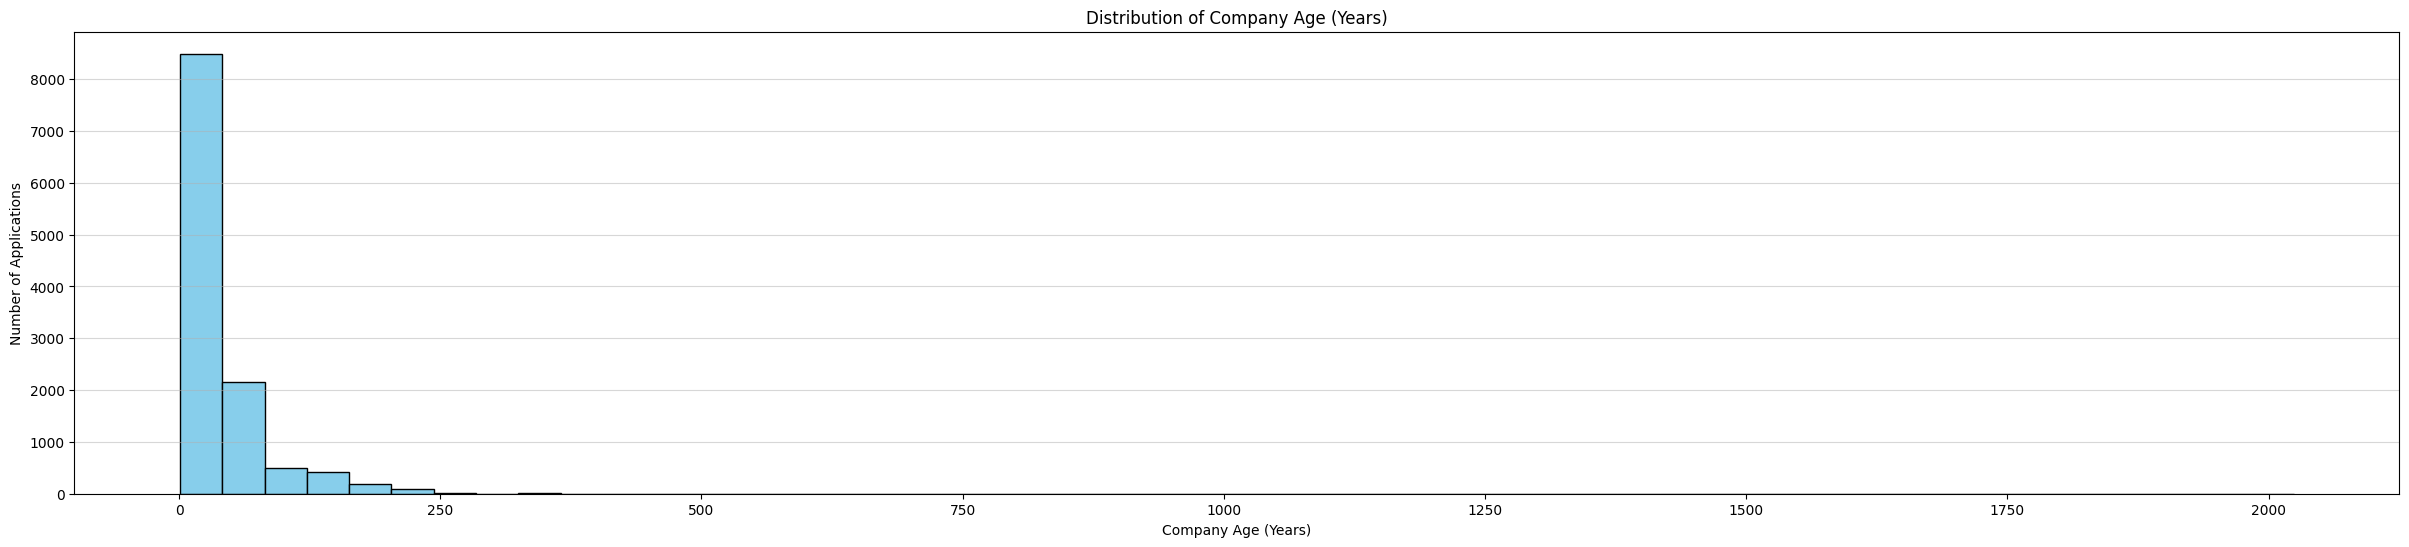

In [ ]:
import matplotlib.pyplot as plt

# 1. Set the size of the plot
plt.figure(figsize=(30, 6))

# 2. Create the histogram
plt.hist(X_train['COMPANY_AGE'], bins=50, edgecolor='black', color='skyblue')

# 3. Add labels and a title for clarity
plt.title('Distribution of Company Age (Years)')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Applications')
plt.grid(axis='y', alpha=0.5)

# 4. Show the plot
plt.show()

## ✅ **Thresholds for company age based on distribution:**

* Young: < 10 years old
* Established: 10 to 25 years old
* Mature: 25 to 45 years old
* Legacy: > 45 years old



```
bins = [0, 10, 25, 45, np.inf]
labels = ['Young', 'Established', 'Mature', 'Legacy']
```


In [ ]:
bins = [0, 10, 25, 45, np.inf]
labels = ['Young', 'Established', 'Mature', 'Legacy']

# Create the new categorical column
X_train['COMPANY_AGE_CAT'] = pd.cut(
    X_train['COMPANY_AGE'],
    bins=bins,
    labels=labels
)

X_test['COMPANY_AGE_CAT'] = pd.cut(
    X_test['COMPANY_AGE'],
    bins=bins,
    labels=labels
)

# Display the new distribution
print("\nCompany Age Category Distribution (Custom Bins):")
print(X_train['COMPANY_AGE_CAT'].value_counts())


Company Age Category Distribution (Custom Bins):
COMPANY_AGE_CAT
Established    4053
Legacy         3189
Young          2467
Mature         2158
Name: count, dtype: int64


## ✅ **Clean Job Titles on graph**



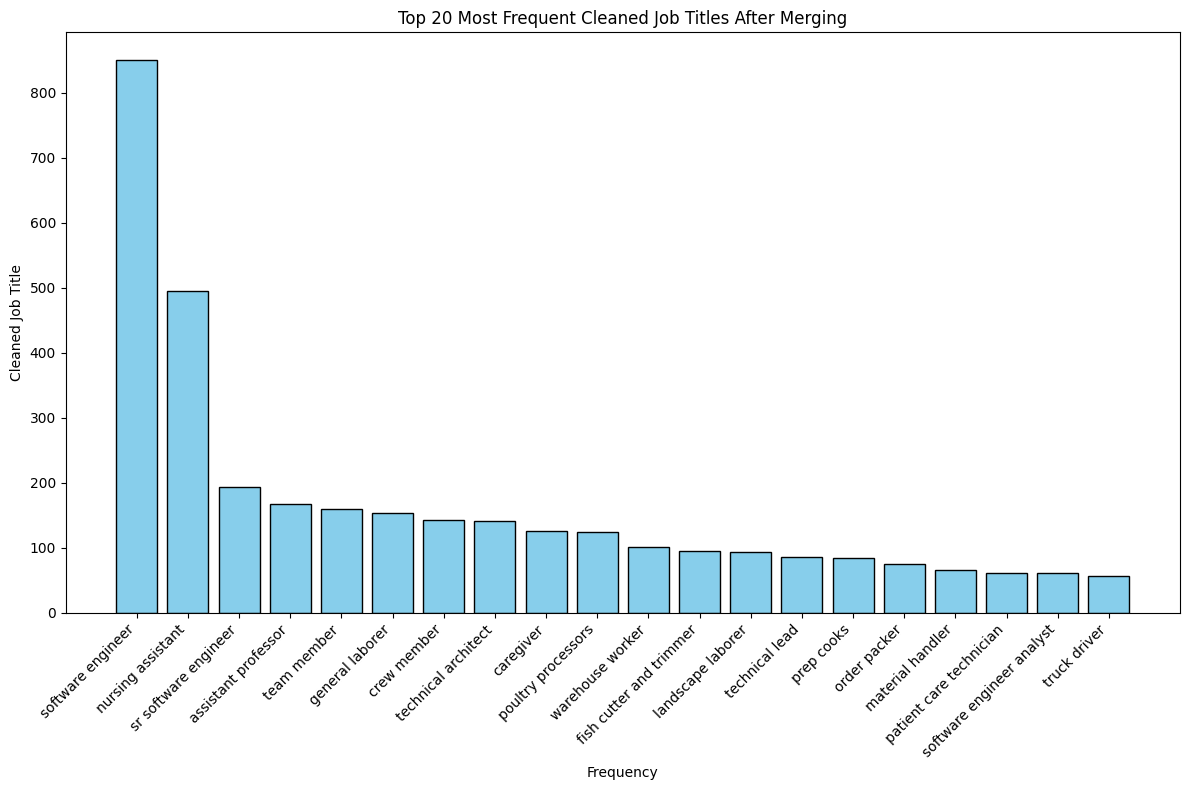

In [ ]:
# Get the top 20 cleaned job titles
top_n = 20
top_job_titles = X_train['JOB_TITLE_CLEAN'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
plt.bar(top_job_titles.index, top_job_titles.values, edgecolor='black', color='skyblue')
plt.title(f'Top {top_n} Most Frequent Cleaned Job Titles After Merging')
plt.xlabel('Frequency')
plt.ylabel('Cleaned Job Title')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout()
plt.show()

## ✅ **Simplify Job title by grouping titles that appears > 50 times**


In [ ]:
#----- Simplify JOB_TITLE (Your core Job Feature) ---
TITLE_THRESHOLD = 50  # Group titles that appear < 50 times
title_counts = X_train['JOB_TITLE_CLEAN'].value_counts()
rare_titles = title_counts[title_counts < TITLE_THRESHOLD].index
X_train['JOB_TITLE_FINAL'] = X_train['JOB_TITLE_CLEAN'].replace(rare_titles, 'Other Job Title')
X_test['JOB_TITLE_FINAL'] = X_test['JOB_TITLE_CLEAN'].replace(rare_titles, 'Other Job Title') # Apply to X_test
print(f"Final Job Title categories (X_train): {X_train['JOB_TITLE_FINAL'].nunique()}")
print(f"Final Job Title categories (X_test): {X_test['JOB_TITLE_FINAL'].nunique()}")


Final Job Title categories (X_train): 25
Final Job Title categories (X_test): 719


## ✅ **Simplify PRIMARY_WORKSITE_BLS_AREA by grouping ares that is > 10 times**


In [ ]:
# --- Simplify PRIMARY_WORKSITE_BLS_AREA (Your core Location Feature) ---
BLS_THRESHOLD = 100 # Group areas that appear < 50 times
bls_counts = X_train['PRIMARY_WORKSITE_BLS_AREA'].value_counts()
rare_bls = bls_counts[bls_counts < BLS_THRESHOLD].index
X_train['BLS_AREA_FINAL'] = X_train['PRIMARY_WORKSITE_BLS_AREA'].replace(rare_bls, 'Other BLS Area')
X_test['BLS_AREA_FINAL'] = X_test['PRIMARY_WORKSITE_BLS_AREA'].replace(rare_bls, 'Other BLS Area') # Apply to X_test
print(f"Final BLS Area categories (X_train): {X_train['BLS_AREA_FINAL'].nunique()}")
print(f"Final BLS Area categories (X_test): {X_test['BLS_AREA_FINAL'].nunique()}")


Final BLS Area categories (X_train): 23
Final BLS Area categories (X_test): 41


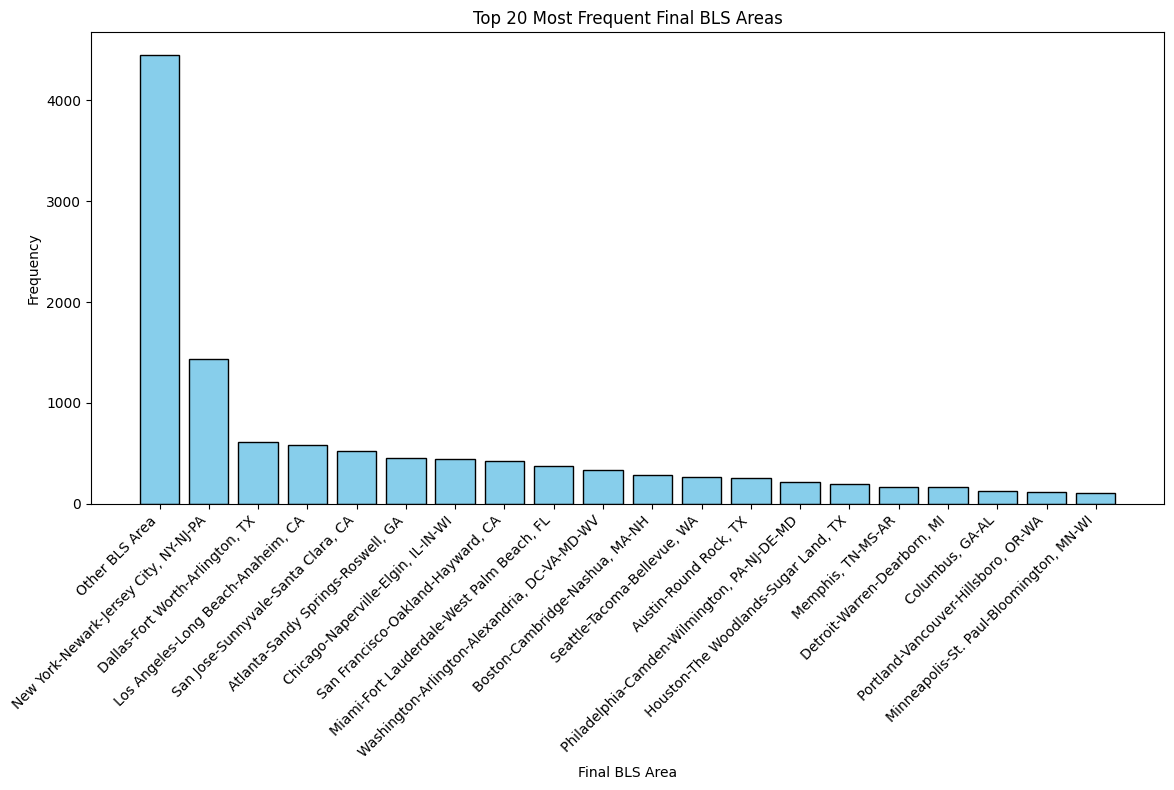

In [ ]:
# Get the top 20 most frequent final BLS areas
top_n = 20
top_bls_areas = X_train['BLS_AREA_FINAL'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
plt.bar(top_bls_areas.index, top_bls_areas.values, edgecolor='black', color='skyblue')
plt.title(f'Top {top_n} Most Frequent Final BLS Areas')
plt.xlabel('Final BLS Area')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 5: Visualize the data in your training set

In [ ]:
import pandas as pd

# One-hot encode the training target variable
y_train_ohe = pd.get_dummies(y_train, prefix='CASE_STATUS', dtype=int)

# One-hot encode the testing target variable
y_test_ohe = pd.get_dummies(y_test, prefix='CASE_STATUS', dtype=int)

print("Original y_train shape:", y_train.shape)
print("One-Hot Encoded y_train_ohe shape:", y_train_ohe.shape)
display(y_train_ohe.head())

Original y_train shape: (11867,)
One-Hot Encoded y_train_ohe shape: (11867, 2)


,CASE_STATUS_Certified,CASE_STATUS_Denied
14218,1,0
6491,1,0
6802,1,0
5025,1,0
4238,1,0


## **📊 1. Target Variable Distribution (CASE_STATUS)**
This code confirms the balance (or imbalance) of your target classes in y_train. This is crucial for classification.

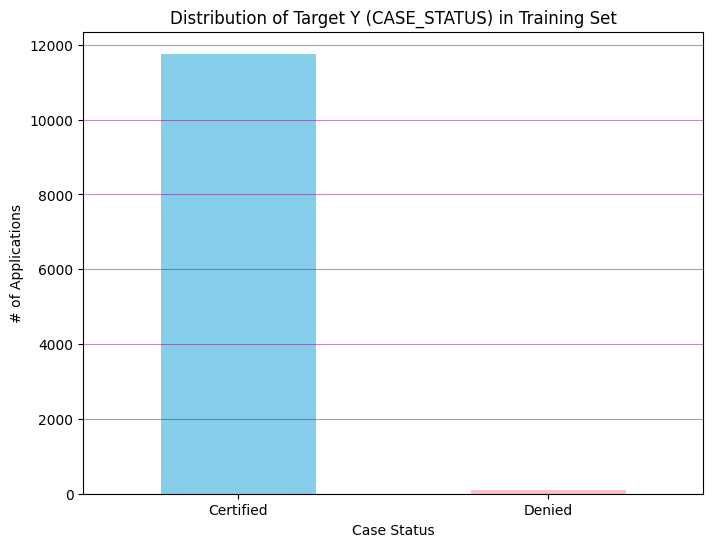

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))
# Plot the frequency of each CASE_STATUS category
y_train.value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Distribution of Target Y (CASE_STATUS) in Training Set')
plt.xlabel('Case Status')
plt.ylabel('# of Applications')
plt.xticks(rotation=0) #horizontal label
plt.grid(axis='y', alpha=0.45, color='purple')
plt.show()

## **📊 2. Numerical Feature Distribution by Target Class (Box Plot)**

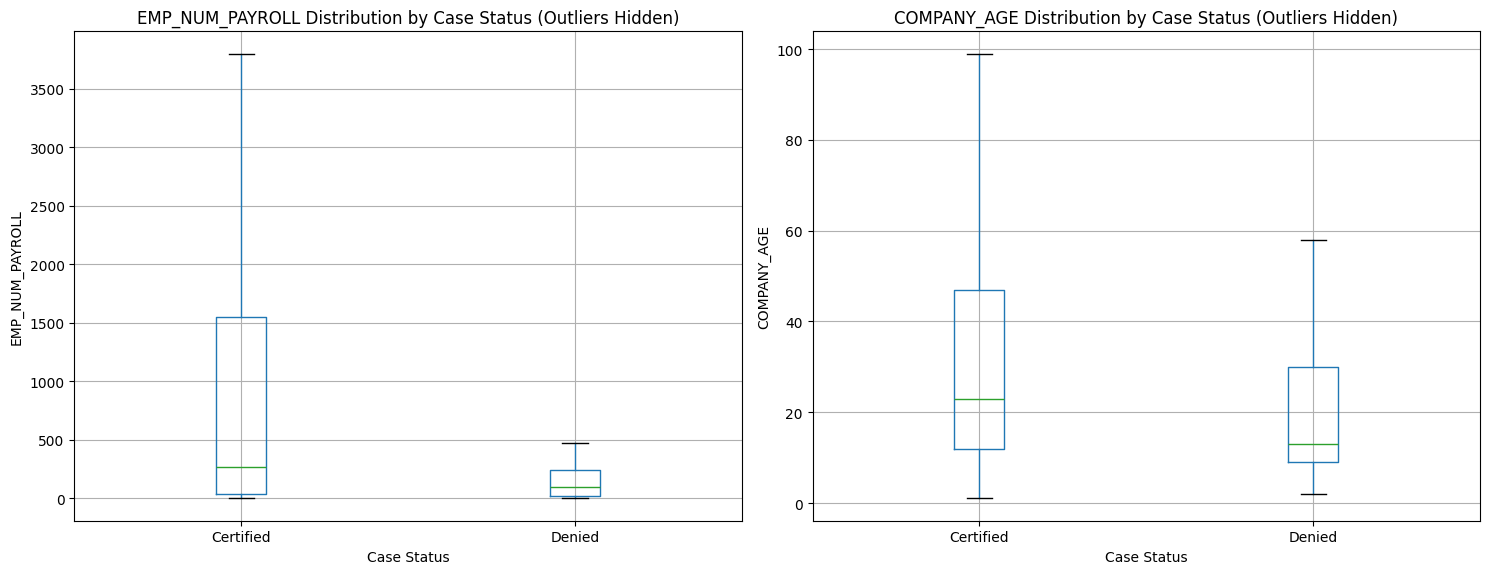

In [ ]:
# Create a temporary DataFrame combining X_train numerical features and y_train
plot_df = X_train[['EMP_NUM_PAYROLL', 'COMPANY_AGE' ]].copy()
plot_df['CASE_STATUS'] = y_train.values

# Define the numerical features to plot
numerical_features = ['EMP_NUM_PAYROLL', 'COMPANY_AGE']

plt.figure(figsize=(15, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 2, i + 1)
    # Boxplot of the numerical feature grouped by CASE_STATUS
    plot_df.boxplot(column=feature, by='CASE_STATUS', ax=plt.gca(), showfliers=False)
    plt.title(f'{feature} Distribution by Case Status (Outliers Hidden)')
    plt.suptitle('') # Suppress the automatic suptitle created by pandas boxplot
    plt.xlabel('Case Status')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

# Step 6: Apply transformations to your data



Apply the four transformations to your two core numerical features: EMP_NUM_PAYROLL and COMPANY_AGE.

All four required transformations applied to both features in X_train.


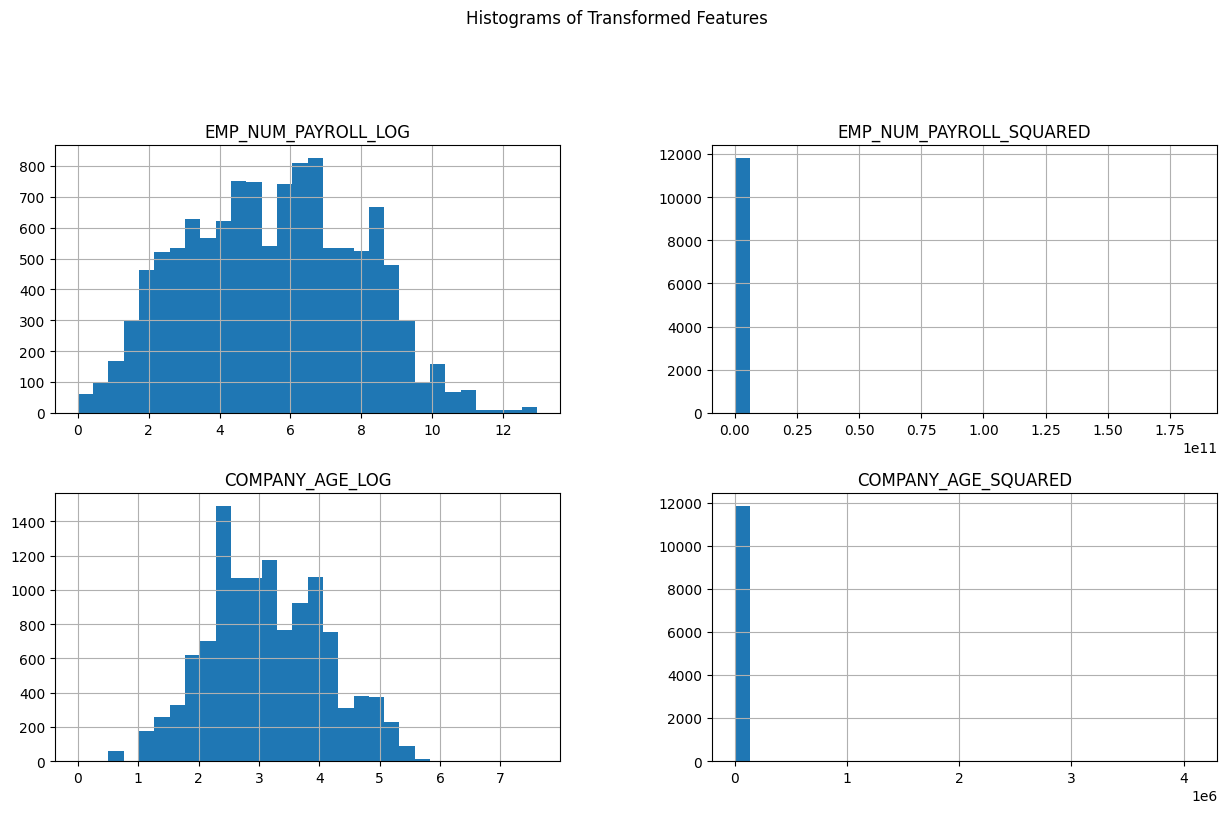

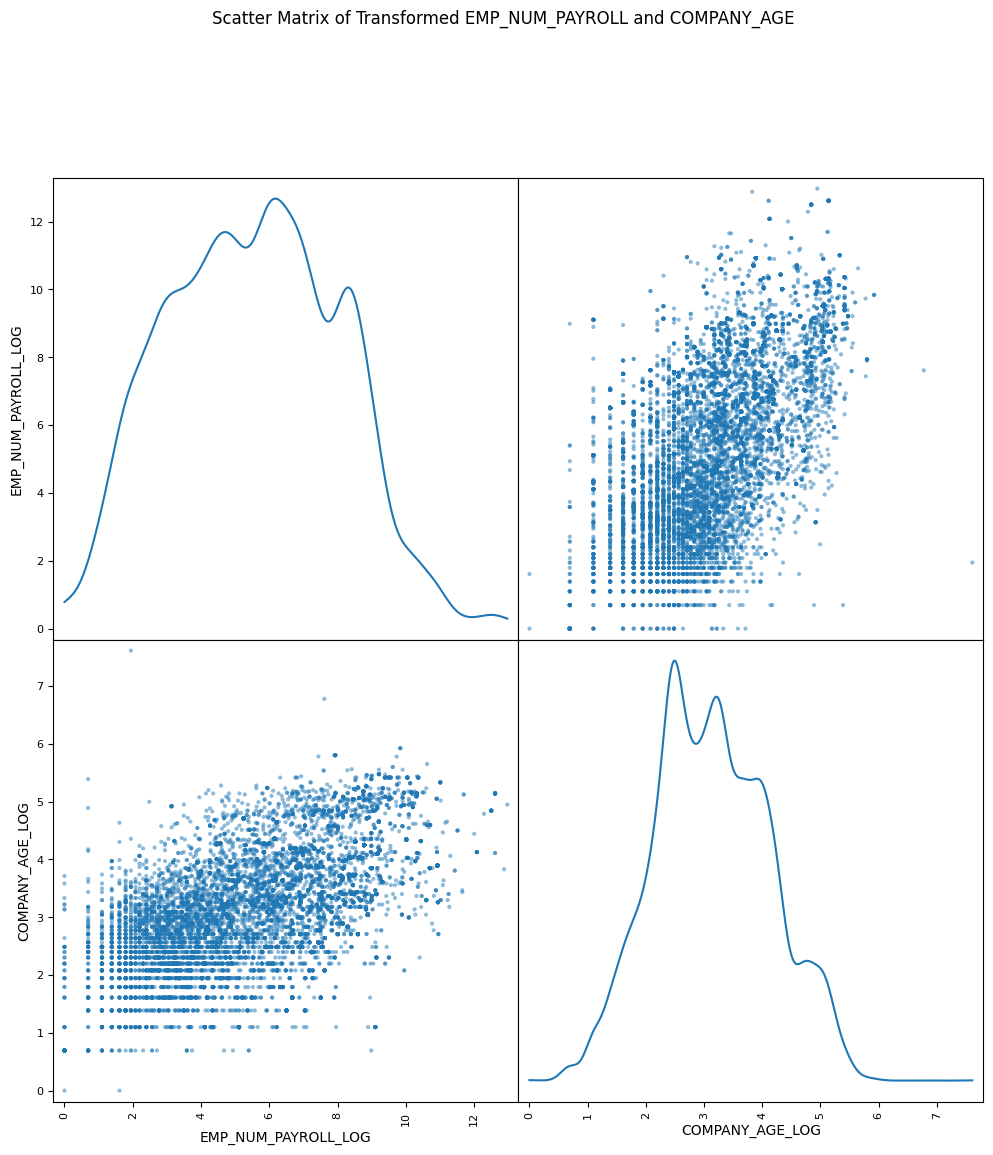

In [ ]:
from pandas.plotting import scatter_matrix

feature_1 = 'EMP_NUM_PAYROLL'
feature_2 = 'COMPANY_AGE'

## Transformations for EMP_NUM_PAYROLL

# Squaring: EMP_NUM_PAYROLL^2
X_train[f'{feature_1}_SQUARED'] = np.square(X_train[feature_1])
# Cubing: EMP_NUM_PAYROLL^3
X_train[f'{feature_1}_CUBED'] = np.power(X_train[feature_1], 3)
# Logarithmic: log(EMP_NUM_PAYROLL + 1) (Adding 1 to handle zero payroll)
X_train[f'{feature_1}_LOG'] = np.log(X_train[feature_1] + 1)
# Exponential: e^(EMP_NUM_PAYROLL / 1000) (Scaled to prevent huge numbers)
X_train[f'{feature_1}_EXP'] = np.exp(X_train[feature_1] / 1000)

## Transformations for COMPANY_AGE

# Squaring: COMPANY_AGE^2
X_train[f'{feature_2}_SQUARED'] = np.square(X_train[feature_2])
# Cubing: COMPANY_AGE^3
X_train[f'{feature_2}_CUBED'] = np.power(X_train[feature_2], 3)
# Logarithmic: log(COMPANY_AGE) (Adding 1e-9 to handle any age of 0 if it existed)
X_train[f'{feature_2}_LOG'] = np.log(X_train[feature_2] + 1e-9)
# Exponential: e^(COMPANY_AGE / 50) (Scaled by a moderate constant)
X_train[f'{feature_2}_EXP'] = np.exp(X_train[feature_2] / 50)

print("All four required transformations applied to both features in X_train.")

## Plot Histograms ##
transformed_features_to_plot = [
    f'{feature_1}_LOG', f'{feature_1}_SQUARED', f'{feature_2}_LOG', f'{feature_2}_SQUARED'
]
X_train[transformed_features_to_plot].hist(bins=30, figsize=(15, 8))
plt.suptitle('Histograms of Transformed Features', y=1.05)
plt.show()
#

## Plot Scatter Matrix ##
# Select the log-transformed versions of the two features for the scatter matrix
final_scatter_features = [
    f'{feature_1}_LOG',
    f'{feature_2}_LOG'
]

scatter_matrix(
    X_train[final_scatter_features],
    figsize=(12, 12),
    diagonal='kde'
)
plt.suptitle('Scatter Matrix of Transformed EMP_NUM_PAYROLL and COMPANY_AGE', y=1.02)
plt.show()
#

###Do the same for Test set

In [ ]:
feature_1 = 'EMP_NUM_PAYROLL'
feature_2 = 'COMPANY_AGE'

## Transformations for EMP_NUM_PAYROLL

# Squaring: EMP_NUM_PAYROLL^2
X_test[f'{feature_1}_SQUARED'] = np.square(X_test[feature_1])
# Cubing: EMP_NUM_PAYROLL^3
X_test[f'{feature_1}_CUBED'] = np.power(X_test[feature_1], 3)
# Logarithmic: log(EMP_NUM_PAYROLL + 1)
X_test[f'{feature_1}_LOG'] = np.log(X_test[feature_1] + 1)
# Exponential: e^(EMP_NUM_PAYROLL / 1000)
X_test[f'{feature_1}_EXP'] = np.exp(X_test[feature_1] / 1000)

### Transformations for COMPANY_AGE

# Squaring: COMPANY_AGE^2
X_test[f'{feature_2}_SQUARED'] = np.square(X_test[feature_2])
# Cubing: COMPANY_AGE^3
X_test[f'{feature_2}_CUBED'] = np.power(X_test[feature_2], 3)
# Logarithmic: log(COMPANY_AGE)
X_test[f'{feature_2}_LOG'] = np.log(X_test[feature_2] + 1e-9) # Using 1e-9 for safety
# Exponential: e^(COMPANY_AGE / 50)
X_test[f'{feature_2}_EXP'] = np.exp(X_test[feature_2] / 50)

print("All four required transformations successfully applied to X_test.")
print(f"New X_test shape: {X_test.shape}")

All four required transformations successfully applied to X_test.
New X_test shape: (2967, 27)


# One hot coding


In [ ]:
# One-hot encode the target variable (CASE_STATUS)
y_train_ohe = pd.get_dummies(y_train, prefix='CASE_STATUS', dtype=int)
y_test_ohe = pd.get_dummies(y_test, prefix='CASE_STATUS', dtype=int)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Define the columns that will be one-hot encoded
categorical_cols = [
    'OCCUPATION_TYPE',
    'PRIMARY_WORKSITE_TYPE',
    'PRIMARY_WORKSITE_STATE',
    'OTHER_REQ_JOB_FOREIGN_LANGUAGE',
    'NAICS_DESCRIPTION',
    'JOB_TITLE_FINAL',
    'BLS_AREA_FINAL'
]

# Define the preprocessor using ColumnTransformer
# 'passthrough' will keep all other numerical and proxy columns
preprocessor = ColumnTransformer(
    transformers=[
        # Apply OneHotEncoder to the selected categorical columns
        ('onehot',
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         categorical_cols)
    ],
    # Keep all other columns (your numerical, log-transformed, and proxy features)
    remainder='passthrough'
)

In [ ]:
# Fit the transformer on the training data
preprocessor.fit(X_train)

# Transform both training and test data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Original X_train shape: {X_train.shape}")
print(f"Processed X_train shape: {X_train_processed.shape}")
print(f"Processed X_test shape: {X_test_processed.shape}")

Original X_train shape: (11867, 27)
Processed X_train shape: (11867, 153)
Processed X_test shape: (2967, 153)
